Analyzing Marine Debris Pollution and Its Impact on Coastal Environment**

In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/nasaa.csv')


In [ ]:
# Display the first 5 rows of the dataset
print(df.head())


   FID   Survey_Type            Organization                 Date Survey_Year  \
0    1  Accumulation  Dauphin Island Sea Lab  2015/07/30 00:00:00      Year 1   
1    2  Accumulation  Dauphin Island Sea Lab  2015/05/09 00:00:00      Year 1   
2    3  Accumulation  Dauphin Island Sea Lab  2015/04/09 00:00:00      Year 1   
3    4  Accumulation                   OCNMS  2015/07/31 00:00:00      Year 4   
4    5  Accumulation  Dauphin Island Sea Lab  2015/05/09 00:00:00      Year 1   

         Country State       County  Survey_ID  MDMAP_ID__  ...  \
0  United States    AL       Mobile       6004         218  ...   
1  United States    AL       Mobile       5763         216  ...   
2  United States    LA  St. Bernard       5899         240  ...   
3  United States    WA      Clallam       3865         100  ...   
4  United States    AL       Mobile       5767         217  ...   

  Rope_Net_Pieces__non_nylon____F  Fabric_Pieces  Fabric_Pieces___Flux  \
0                             0.0   

In [ ]:
# Display summary info about the DataFrame (number of rows, columns, data types, etc.)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Columns: 142 entries, FID to Debris_Description
dtypes: float64(76), int64(44), object(22)
memory usage: 2.3+ MB
None
               FID     Survey_ID   MDMAP_ID__  Latitude_Start  \
count  2121.000000   2121.000000  2121.000000     2121.000000   
mean   1061.000000   6454.105139   242.178689       37.255690   
std     612.424281   1997.043020   272.485514       10.057560   
min       1.000000   3153.000000    11.000000      -18.686870   
25%     531.000000   4658.000000   115.000000       30.199109   
50%    1061.000000   6014.000000   189.000000       37.736010   
75%    1591.000000   8366.000000   226.000000       47.177000   
max    2121.000000  10856.000000  1164.000000       60.083370   

       Longitude_Start  Latitude_End  Longitude_End        Slope        Width  \
count      2121.000000   2121.000000    2121.000000  2121.000000  2121.000000   
mean       -110.527206     37.255773    -110.382818     1.76

In [ ]:
# Check for missing values
df.isnull().sum()

,0
FID,0
Survey_Type,0
Organization,0
Date,0
Survey_Year,0
...,...
Unclassified,0
Unclassified___Flux,0
Total_Debris,0
Total_Debris___Flux,597


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


FID                       0
Survey_Type               0
Organization              0
Date                      0
Survey_Year               0
                       ... 
Unclassified              0
Unclassified___Flux       0
Total_Debris              0
Total_Debris___Flux     597
Debris_Description     1689
Length: 142, dtype: int64


In [ ]:
# Convert 'Total_Debris___Flux' to numeric, forcing errors to NaN
df['Total_Debris___Flux'] = pd.to_numeric(df['Total_Debris___Flux'], errors='coerce')

# Fill missing values with 0
df['Total_Debris___Flux'].fillna(0, inplace=True)


In [ ]:
df['Debris_Description'].fillna('No description provided', inplace=True)


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


FID                    0
Survey_Type            0
Organization           0
Date                   0
Survey_Year            0
                      ..
Unclassified           0
Unclassified___Flux    0
Total_Debris           0
Total_Debris___Flux    0
Debris_Description     0
Length: 142, dtype: int64


In [ ]:
# Check data types of all columns
print(df.dtypes)


FID                      int64
Survey_Type             object
Organization            object
Date                    object
Survey_Year             object
                        ...   
Unclassified           float64
Unclassified___Flux    float64
Total_Debris           float64
Total_Debris___Flux    float64
Debris_Description      object
Length: 142, dtype: object


<Axes: title={'center': 'Total Amount of Debris by Type'}>

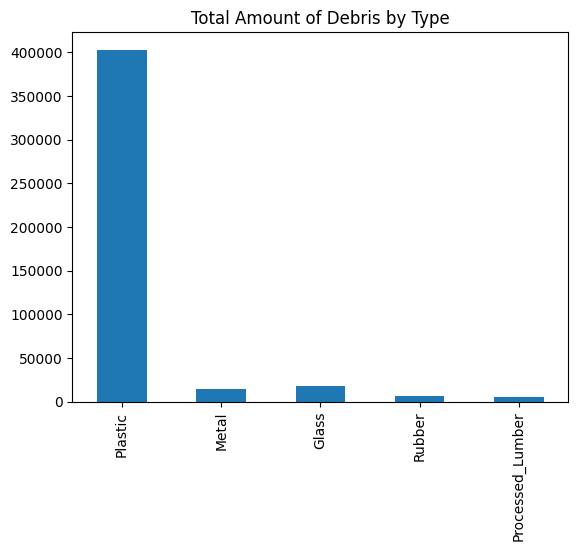

In [ ]:
debris_columns = ['Plastic', 'Metal', 'Glass', 'Rubber', 'Processed_Lumber']
df[debris_columns].sum().plot(kind='bar', title='Total Amount of Debris by Type')


In [ ]:
region_debris = df.groupby(['Country', 'State', 'County'])[debris_columns].sum().reset_index()
region_debris.head()


,Country,State,County,Plastic,Metal,Glass,Rubber,Processed_Lumber
0,Bahamas,AI,Andros Island,626,7,4,2,0.000000e+00
1,Canada,BC,Gwaii Haanas,8173,26,58,38,2.560000e-07
2,Ecuador,MA,Puerto López,333,1,12,7,3.000000e+00
3,Ecuador,MA,Salango,429,1,10,4,1.100000e+01
4,Mexico,JA,"Puerto Vallarta, Jalisco",402,59,5,18,1.200000e+01


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Extract year from 'Date' column
df['Survey_Year'] = df['Date'].dt.year


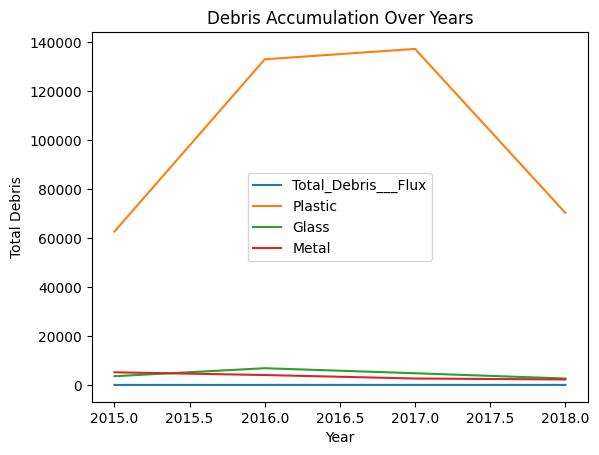

In [ ]:
import matplotlib.pyplot as plt

# List of debris-related columns
debris_columns = ['Total_Debris___Flux', 'Plastic', 'Glass', 'Metal']  # Example columns, adjust as needed

# Group by 'Survey_Year' and sum debris columns
seasonal_debris = df.groupby('Survey_Year')[debris_columns].sum()

# Plot the data
seasonal_debris.plot(kind='line', title='Debris Accumulation Over Years')
plt.xlabel('Year')
plt.ylabel('Total Debris')
plt.show()


In [ ]:
# Check unique values in 'Total_Debris' column
print(df['Total_Debris'].unique())


[1.332712e-03 2.960390e-04 5.600000e-04 ... 6.552710e-04 2.310000e-06
 3.980000e-05]


In [ ]:
# Convert 'Total_Debris' and any other relevant columns to numeric
df['Total_Debris'] = pd.to_numeric(df['Total_Debris'], errors='coerce')

# Example for other columns that may be numeric
# df['Another_Numeric_Column'] = pd.to_numeric(df['Another_Numeric_Column'], errors='coerce')

# Fill NaN values with a specific value or method
df.fillna(0, inplace=True)  # You can also use other imputation methods if appropriate


In [ ]:
# Verify the data types of all columns
print(df.dtypes)


FID                             int64
Survey_Type                    object
Organization                   object
Date                   datetime64[ns]
Survey_Year                     int32
                            ...      
Unclassified                  float64
Unclassified___Flux           float64
Total_Debris                  float64
Total_Debris___Flux           float64
Debris_Description             object
Length: 142, dtype: object


In [ ]:
import folium
from folium.plugins import HeatMap

# Initialize map centered around a general region
debris_map = folium.Map(location=[20.0, -80.0], zoom_start=5)

# Add heat map layer for plastic debris hotspots
heat_data = [[row['Latitude_Start'], row['Longitude_Start']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(debris_map)

# Save and display map
debris_map.save("debris_hotspots_map.html")
debris_map


In [ ]:
# Encode storm activity (Yes/No)
df['Storm_Activity'] = df['Storm_Activity'].map({'Yes': 1, 'No': 0})

# Correlation analysis
corr = df[['Storm_Activity', 'Total_Debris']].corr()
print(corr)


                Storm_Activity  Total_Debris
Storm_Activity             NaN           NaN
Total_Debris               NaN           1.0


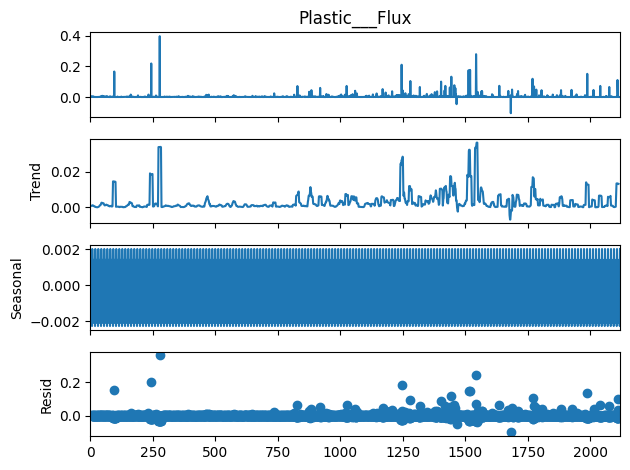

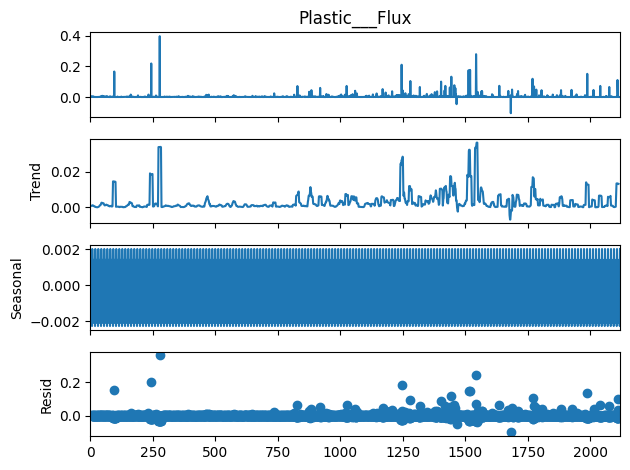

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Plastic___Flux'], period=12)
decomposition.plot()


<Axes: title={'center': 'Debris Composition'}>

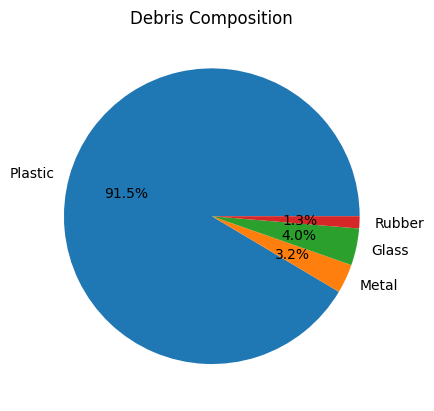

In [ ]:
df[debris_columns].sum().plot(kind='pie', autopct='%1.1f%%', title='Debris Composition')


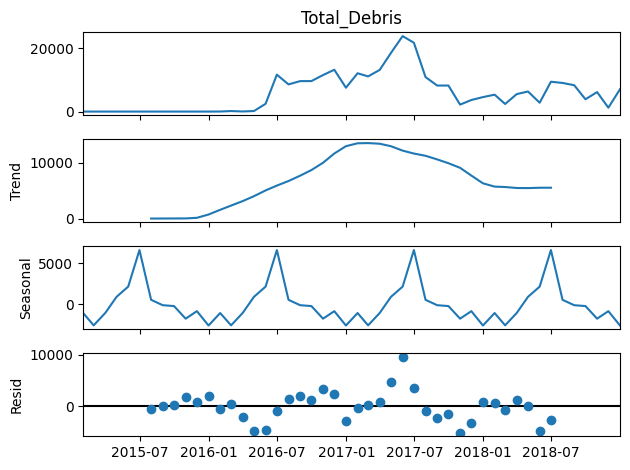

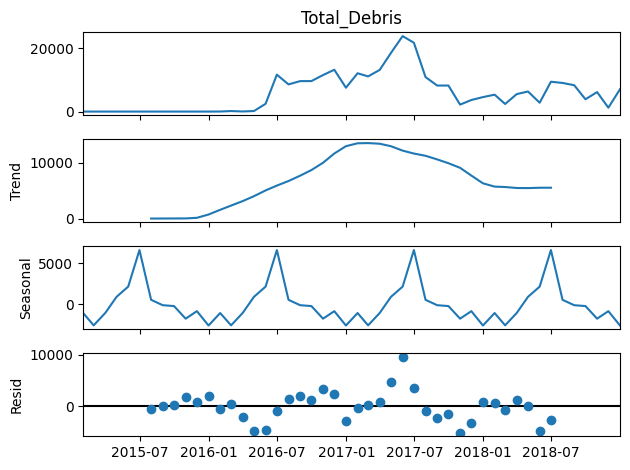

In [ ]:
import statsmodels.api as sm

# Assuming 'Date' is already in datetime format and 'Total_Debris' is numeric
df.set_index('Date', inplace=True)
ts_data = df['Total_Debris'].resample('M').sum()

# Perform decomposition to analyze trends and seasonality
decomposition = sm.tsa.seasonal_decompose(ts_data, model='additive')
decomposition.plot()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Date'>

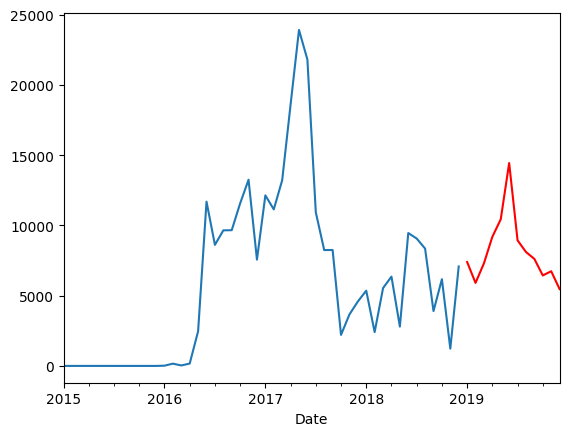

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast future values
forecast = fit.forecast(steps=12)
ts_data.plot(label='Observed')
forecast.plot(label='Forecast', color='red')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-41-368c2144356e>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = clusters


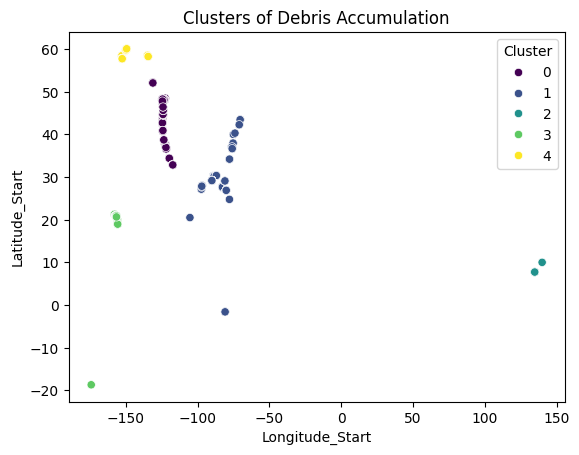

In [ ]:
from sklearn.cluster import KMeans

# Extract coordinates and debris values
coords = df[['Latitude_Start', 'Longitude_Start']].values
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(coords)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Plot clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Longitude_Start', y='Latitude_Start', hue='Cluster', palette='viridis')
plt.title('Clusters of Debris Accumulation')
plt.show()
